In [ ]:
import sc
sc.init('subscriber_searching.txt')

In [ ]:
sc.sc()

# Web Crawler (Scraping the Web)

[Wiki - Web Crawler](https://www.wikiwand.com/zh-cn/%E7%B6%B2%E8%B7%AF%E7%88%AC%E8%9F%B2)
======
> A Web crawler is an Internet bot which **systematically browses** the World Wide Web, typically for the purpose of Web indexing

![crawler arch](images/WebCrawlerArchitecture.svg.png)

### Video:[Web Crawler - CS101 - Udacity](https://www.youtube.com/watch?v=CDXOcvUNBaA&hd=1)

### Where to start? 
* [Top 30 Free Web Scraping Software](http://www.octoparse.com/blog/top-30-free-web-scraping-software/)
- [八爪鱼采集器](http://www.bazhuayu.com/about)
- [Scrapy](http://scrapy.org/)

 [Wiki - Web Scraping](https://www.wikiwand.com/zh-cn/%E7%BD%91%E9%A1%B5%E6%8A%93%E5%8F%96)
 ======
> Web scraping (web harvesting or web data extraction) is a computer software technique of extracting information from websites.

> Techniques:
> - Human copy-and-paste
> - Text grepping and regular expression matching  
[regular expression for url](http://t.cn/RcrMHbr)
> - HTTP programming
> - HTML parsers
![HTML Tags](images/html_tags.png)
(https://www.nobledesktop.com/html-quick-guide/)
> - DOM(_Document Object Model_) parsing
![DOM Tree](images/domTree.jpg)

## [《Web Scraping with Python, 2nd Edition（Python网络数据采集）》](https://item.jd.com/11896401.html)
#### by Ryan Mitchell (2018)

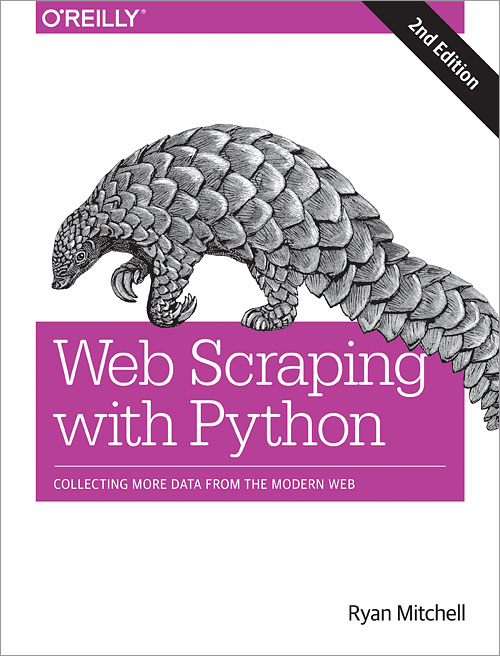

- 第一部分重点介绍网络数据采集的基本原理：如何用Python从网络服务器请求信息，如何对服务器的响应进行基本处理，以及如何以自动化手段与网站进行交互；
- 第二部分介绍如何用网络爬虫测试网站，自动化处理，以及如何通过更多的方式接入网络

> - **解析**复杂HTML页面
> - 用**Scrapy框架**开发爬虫
> - 学习**存储数据**的方法
> - 从文档中读取和**提取数据**
> - **清理并规范化**带有格式错误的数据
> - 读写**自然语言**
> - 通过**表单、登录**进行采集
> - JavaScript 内容和通过API抓取
> - 使用和编写图像-文本转换软件
> - 避免陷阱和屏蔽
> - 用爬虫测试网站

### [Scrapy](http://scrapy.org/)'s Features
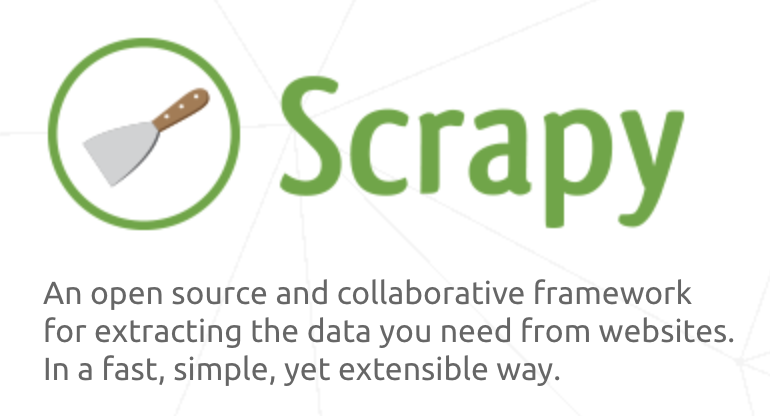
> - 用Python编写脚本
> - 强大的WebUI与脚本编辑器，任务监视器，项目管理器和结果查看器
> - mysql, MongoDB, Redis, SQLite, PostgreSQL与SQLAlchemy数据库后端
> - rabbitmq、Beanstalk、Redis和Kombu 作为消息队列
> - 任务优先级、重试、周期，按新旧重新爬取，等等…
> - 分布式架构，抓取Javascript页面，Python 2&3 支持等等…

### There's libs for that!
* [lxml](http://lxml.de/)
* [requests](http://docs.python-requests.org/en/latest/)
* [Scrapy](https://scrapy.org/)
* [Beautiful Soup](http://www.crummy.com/software/BeautifulSoup/)
* [mechanize](https://pypi.python.org/pypi/mechanize) 

### and Chrome DevCenter & Plugins...

* [XPath Helper](https://chrome.google.com/webstore/detail/xpath-helper/hgimnogjllphhhkhlmebbmlgjoejdpjl?hl=zh-CN)
* [Postman](https://chrome.google.com/webstore/detail/postman/fhbjgbiflinjbdggehcddcbncdddomop?hl=zh-CN)

### Page Parsing technology
- XPath / CSS Path
- Regular Expression

浏览器浏览网页过程解析
=====
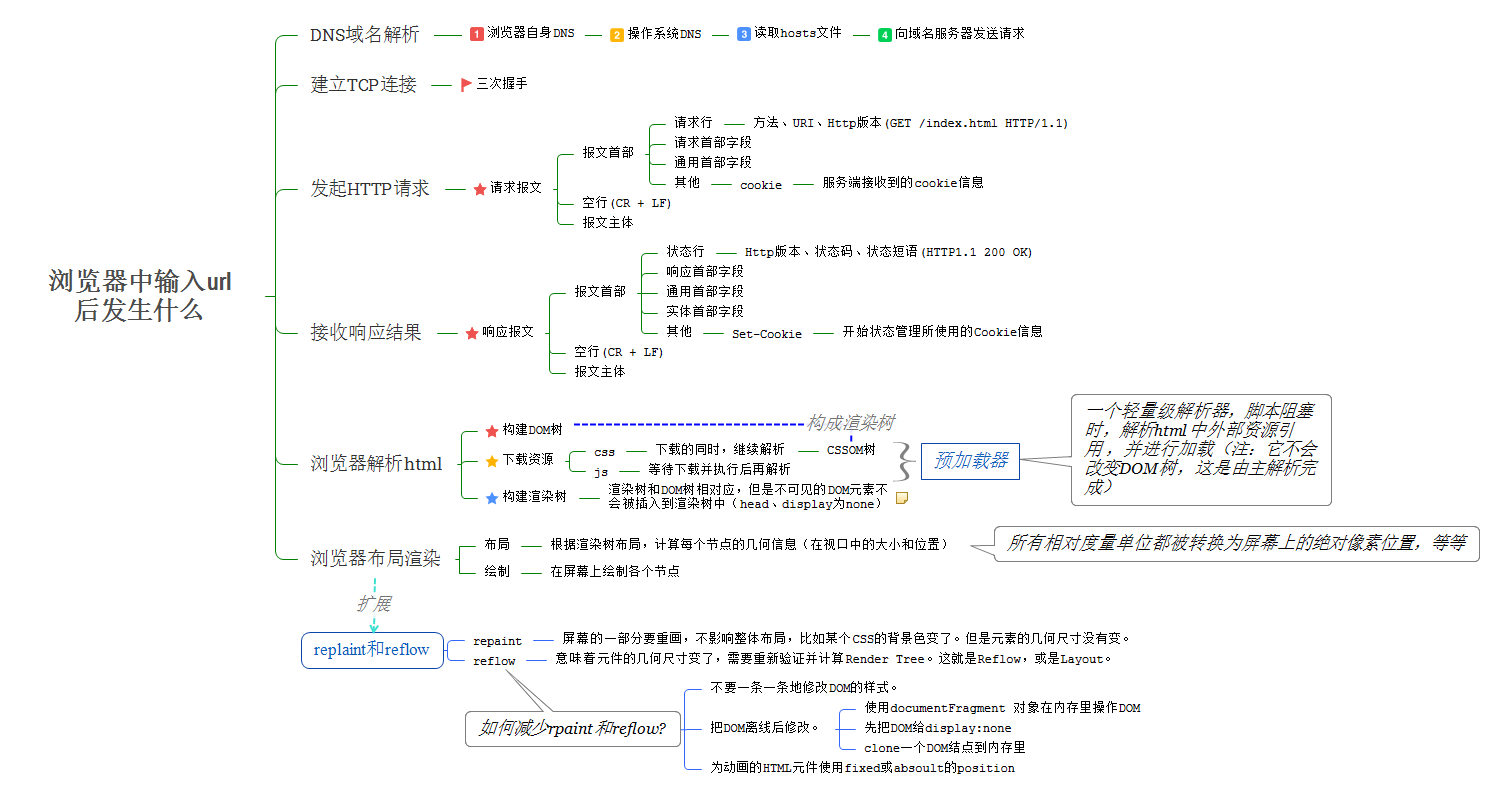
ref:
[《浏览器中输入url后发生了什么》](https://www.jianshu.com/p/c1dfc6caa520)
[《What happens when you type an URL in the browser and press enter?》](https://medium.com/@maneesha.wijesinghe1/what-happens-when-you-type-an-url-in-the-browser-and-press-enter-bb0aa2449c1a)

HTML and the DOM
========
- 网页爬取背后的一般思想，是获取网站上已有的数据，并将其转换成可用于分析的格式。网页是由浏览器从HTML和CSS代码中呈现的，但是HTML中包含的许多信息对我们来说都不感兴趣。
- 首先读取网页的源代码，然后用BeautifulSoup函数创建BeautifulSoup对象。

In [35]:
from bs4 import BeautifulSoup
import urllib
url = 'http://www.bazhuayu.com/about'
r = urllib.urlopen(url).read()
soup = BeautifulSoup(r, "lxml")
print type(soup)

<class 'bs4.BeautifulSoup'>


BeautifulSoup对象包含原始文档中所有HTML。

In [36]:
print soup.prettify()[0:1000]

<!DOCTYPE html>
<html lang="zh-cn">
 <head>
  <meta charset="utf-8"/>
  <title>
   产品介绍 - 八爪鱼采集器
  </title>
  <meta content="八爪鱼产品介绍" name="keywords"/>
  <meta content="八爪鱼产品介绍" name="description"/>
  <meta content="pc" name="applicable-device"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=0" name="viewport"/>
  <meta content="my5tMHFCbI" name="baidu-site-verification"/>
  <meta content="八爪鱼采集器 - 视界科技旗下产品" name="author"/>
  <meta content="no-transform " http-equiv="Cache-Control"/>
  <meta content="zpPiFXIJuf" name="baidu-site-verification"/>
  <link href="/favicon-new.ico" rel="shortcut icon"/>
  <!-- Le styles -->
  <link href="/dist/css/zui.min.css" rel="stylesheet"/>
  <link href="/dist/css/common.css?v=1" rel="stylesheet"/>
  <link href="/dist/css/site.min.css?v=1" rel="stylesheet"/>
  <script src="/dist/js/jquery-1.10.2.min.js">
  </script>
  <script src="/dist/js/jquery.cookie.js">
  </script>
  <script src="/dist/j

尖括号包围的HTML标签提供了**结构信息**(有时也提供了**格式**)，我们可能并不关心这些信息本身，但这些结构对**选
择与我们的需求相关的内容**很有关系。

Beautiful Soup本质上是一组封装函数，使得**选择普通的HTML元素**变得简单。

![dom tree](images/dom_tree.png)

大多数现代浏览器都有一个解析器，它读取HTML源码，将其解析成DOM (文档对象模型)结构，然后渲染该DOM结构。和HTTP一样，DOM是个网页结构的公认标准。

DOM比这里描述的要多得多，但对我们来说，最重要的是理解文本只是HTML元素的一部分，我们需要准确地选择它们。

![dom tree](images/dom_tree2.png)

More about DOM Tree:
- [DOM visualization](http://dok.github.io/dom-visualization/)
- [Live DOM Viewer](https://software.hixie.ch/utilities/js/live-dom-viewer/)
- [HTML DOM Tree](https://gojs.net/latest/samples/DOMTree.html)

XPath & lxml:
========
`<div id=’idValue’ class=’classValue’ username='username'>
    <a href='http://www.bupt.edu.cn' target='_blank'>BUPT Home</a>
    <div>
        <a href='#'>click here 1st</a>
        <a href='#'>click here 2nd</a>
        <a href='#'>click here 3rd</a>
    </div>
</div>`
![XPath CSS Path Cheat Sheet](images/XpathCssPathCheatSheet.jpg)
(http://axatrikx.com/xpath-css-path-cheat-sheet/)

- [[XPath] XPath 与 lxml （一）XPath 术语](http://www.cnblogs.com/ifantastic/p/3863271.html)  
- [[XPath] XPath 与 lxml （二）XPath 语法](http://www.cnblogs.com/ifantastic/p/3863415.html)  
- [[XPath] XPath 与 lxml （三）XPath 坐标轴](http://www.cnblogs.com/ifantastic/p/3863808.html)

### To the internet (with dev tools)
#### [MTime](http://www.mtime.com/hotest/)
浏览网页结构，用Chrome开发者工具或插件[XPath Helper](https://chrome.google.com/webstore/detail/xpath-helper/hgimnogjllphhhkhlmebbmlgjoejdpjl?hl=zh-CN), 得到电影标题的xpath——"//dl/dt/a/text()". 用lxml获取符合xpath的节点的相关属性和数据.

Full XPath for movie name:
/html/body[@id='bodyRegion']/div[@class='centent']/div[@class='mtimetip']/div[@class='mtipbox']/div[@class='mtipmid']/div[@class='mtiplist'][2]/div[@class='clearfix']/div[@class='picbox']/dl/dt/a

In [43]:
#encoding=utf-8
from lxml import html 

x = html.parse('http://www.mtime.com/hotest/')
titles = x.xpath("//div[@class='picbox']/dl/dt/a/text()")
print "We got %s titles:" % len(titles)
for title in titles:
    print title

We got 10 titles:
毒液：致命守护者  Venom(2018)
铁血战士  The Predator(2018)
功夫联盟  Gong Fu Lian Meng(2018)
大轰炸  Unbreakable Spirit(2018)
我的间谍前男友  The Spy Who Dumped Me(2018)
宝贝儿  Baby(2018)
冰封侠：时空行者  Iceman: Time Traveller(2018)
雪怪大冒险  Smallfoot(2018)
无敌原始人  Early Man(2018)
昨日青空  Crystal Sky Of Yesterday(2018)


full XPath for score:
/html/body[@id='bodyRegion']/div[@class='centent']/div[@class='mtimetip']/div[@class='mtipbox']/div[@class='mtipmid']/div[@class='mtiplist'][7]/div[@class='clearfix']/div[@class='picbox']/div[@class='score']/strong

In [44]:
scores = x.xpath("//div[@class='score']/strong/text()")
for score in scores:
    print score

7.3
6.5


In [46]:
groups = x.xpath('//div[@class="mtiplist"]')
for group in groups:
    titles = group.xpath(".//dt/a/text()")
    scores = group.xpath(".//div[@class='score']/strong/text()")
    print titles[0], scores

毒液：致命守护者  Venom(2018) ['7.3']
铁血战士  The Predator(2018) []
功夫联盟  Gong Fu Lian Meng(2018) []
大轰炸  Unbreakable Spirit(2018) []
我的间谍前男友  The Spy Who Dumped Me(2018) []
宝贝儿  Baby(2018) []
冰封侠：时空行者  Iceman: Time Traveller(2018) []
雪怪大冒险  Smallfoot(2018) []
无敌原始人  Early Man(2018) ['6.5']
昨日青空  Crystal Sky Of Yesterday(2018) []


In [ ]:
for i in range(1, 11):
    actors = x.xpath("//div[%s]/div/div/dl/dd/ul/li[2]/a/text()" % i)
    print actors
    for actor in actors:
        print actor
    print '-----'

### Scraping for Multi-pages

每页有大约10个电影。页面底部有“下一页”按钮，会带到另一个结构类似的页面，有更多电影和另一个“下一页”，循环采集“下一页”链接，可得到更多电影信息

In [ ]:
# We'll use sleep to add some time in between requests
# so that we're not bombarding Gawker's server too hard. 
from time import sleep

# Now we'll fill this list of gawker titles by starting
# at the landing page and following "More Stories" links
titles = []
base_url = 'http://www.mtime.com/hotest/{}'
next_page = "http://www.mtime.com/hotest/"

# These are the xpaths we determined from snooping 
next_button_xpath = "//a[@id='key_nextpage']/@href"
headline_xpath = "//div[@class='picbox']/dl/dt/a/text()"

while len(titles) < 50 and next_page:
    dom = html.parse(next_page)
    headlines = dom.xpath(headline_xpath)
    print "Retrieved {} titles from url: {}".format(len(headlines), next_page)
    titles += headlines
    next_pages = dom.xpath(next_button_xpath)
    if next_pages: 
        next_page = base_url.format(next_pages[0]) 
    else:
        print "No next button found"
        next_page = None
    sleep(3)

In [ ]:
for title in titles[:25]:
    print title

In [ ]:
with open('mtime_titles.txt', 'wb') as out:
    out.write('\n'.join(titles).encode('utf-8'))
with open('mtime_titles.txt') as f:
    titles_ = f.readlines()
    
print "Well, we got {} Hot Movies!".format(len(titles_))
for title in titles[:15]:
    print title

### a special example

In [ ]:
y = html.parse('http://music.baidu.com/top/dayhot')
next_page = y.xpath("//a[@class='page-navigator-next']/@href")
print next_page

In [ ]:
print [str(next_page[0]).strip()]

In [ ]:
print ['http://music.baidu.com' + 
       str(next_page[0])
           .replace('\\t', '')
           .replace('\\n', '')
           .replace('[\'', '').replace('\']', '')
           .strip()
      ]

### Another xpath example

In [ ]:
import requests
url = 'https://book.douban.com/series/1163?page=11'
page = requests.get(url)
y = html.fromstring(page.content)
stars = y.xpath("//div[@class='star clearfix']/*")
for star in stars:
    print star.attrib['class'], star.text.strip() if star.attrib['class'] == 'rating_nums' or star.attrib['class'] == 'pl'  else ''

## [A Simple Crawler Example](https://github.com/gwulfs/bostonml/blob/master/scraping/scraping.ipynb)


#### How about regular expression?

In [ ]:
import requests
import re

url = 'http://book.douban.com/series/1163?page=11'
re_extract = re.compile('<a href="(.*?)" title="(.*?)"[\S\s]*?class="pub">([\S\s]*?)<\/div>')
page = requests.get(url)
item_match = re.findall(re_extract, page.content)
if item_match:
    for item_info in item_match:
        print item_info
        print item_info[0]
        print item_info[1]
        print item_info[2].strip(), '\n'

### About Regular Expression:

![Python Regular Expression](images/pyre_ebb9ce1c-e5e8-4219-a8ae-7ee620d5f9f1.png)

References:
- [Regulex](https://jex.im/regulex/)
- [regular expressions 101](https://regex101.com/)
- [Regex Builder](https://regexbuilder.codeplex.com/)
- [Python正则表达式指南](http://www.cnblogs.com/huxi/archive/2010/07/04/1771073.html)

- [BeautifulSoup](http://www.crummy.com/software/BeautifulSoup/)

In [ ]:
import re
import requests

url = 'http://www.mtime.com/hotest'
page = requests.get(url)
re_extract = re.compile('<div class="picbox">.*?<img src="(.*?)".*?<a href="(.*?)" target="_blank">(.*?)</a>.*?导演：\s*(.*?)</li>.*?主演：\s*(.*?)</li>.*?</div>')
item_match = re.findall(re_extract, page.content)
if item_match:
    for info_list in item_match[:3]:
        for item_info in info_list:
            item_info_r = re.sub('\s*<\/?a.*?>\s*', '', item_info)
            item_info_r = re.sub('\s+', ' ', item_info_r)
            print item_info_r.replace('&nbsp;', ' ')
        print '\n'

### Python编码问题
简而言之，Python 2.x里字符串有两种：str和Unicode  
前者到后者要decode，后者到前者要encode,'utf-8'为例：  
str.decode('utf-8') -> Unicode  
str <- Unicode.encode('utf-8')

In [ ]:
print "Type of    '中文'   is %s" % type('中文')
print "Type of   '中文'.decode('utf-8')   is %s" % type('中文'.decode('utf-8')) 
print "Type of   u '中文'   is %s" % type(u'中文')
print "Type of   u'中文'.encode('utf-8')   is %s" % type(u'中文'.encode('utf-8')) 

建议一、使用字符编码声明，并且同一工程中的所有源代码文件使用相同的字符编码声明

In [ ]:
#encoding=utf-8

建议二、抛弃str，全部使用unicode

In [ ]:
test1 = 'présenter'
test2 = u'汉字'
print type(test1)
test_unicode = test1.decode('utf-8')
print type(test_unicode)
print ("%s+%s" % (test_unicode, test2)).encode('utf-8')

JS里转义字符串的处理

In [ ]:
src_str = u"\\u4e09\\u73af\\u4ee5\\u5185"
print src_str.encode('utf-8')

In [ ]:
tar_str_decode = src_str.decode("unicode-escape")
print tar_str_decode.encode('utf-8')

In [ ]:
tar_str_eval = eval("u\"" + src_str + "\"")
print tar_str_eval.encode('utf-8')

References:
- [Python字符编码详解](http://www.cnblogs.com/huxi/archive/2010/12/05/1897271.html)

## About Ajax

Let’s start with the imports:

In [ ]:
from lxml import html
import requests

Next we will use requests.get to retrieve the web page with our data, parse it using the html module:

### Headers
- User-Agent
- Referer
- Cookie
- Accept

In [ ]:
cookie = ''
headers = {
    'cookie': cookie
}
page = requests.get('http://bbs.byr.cn/board/Recommend', headers=headers)
tree = html.fromstring(page.text)

In [ ]:
print page.text.encode('utf-8')

```html
<td class="title_9"><a href="……" class="">【公告】北邮人论坛热点活动管理条例</a></td>
…… 
<td class="title_12">| <a href="/user/query/wangxiaobupt" class="c63f">wangxiaobupt</a></td>
```

Knowing this we can create the correct XPath query:

In [ ]:
title_xpath = '//td[@class="title_9"]/a/text()'
author_xpath = '//a[@class="c63f"]/text()'

Use the lxml xpath function like this:

In [ ]:
titles = tree.xpath(title_xpath)
authors = tree.xpath(author_xpath)
print "We got %s titles and %s authors" % (len(titles), len(authors))

Why? Let's introduce Ajax(Asynchronous JavaScript and XML)
[WikiPedia Page](https://www.wikiwand.com/zh/AJAX)
![Ajax](images/Ajax-vergleich-en.svg.png)
![Ajax](images/dojo_0401.png)

So let's review the page code... 

### Web Debugging Proxy
- [Fiddler](http://www.telerik.com/fiddler)
- [Charles](http://www.charlesproxy.com/)

[Convert cURL syntax to Python, Node.js, PHP](http://curl.trillworks.com/)

In [ ]:
import requests

headers = {
#     'dnt': '1',
#     'accept-encoding': 'gzip, deflate, sdch, br',
    'x-requested-with': 'XMLHttpRequest',
#     'accept-language': 'en-US,en;q=0.8,zh-CN;q=0.6,zh;q=0.4',
#     'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/53.0.2785.143 Safari/537.36',
#     'accept': '*/*',
#     'cache-control': 'max-age=0',
#     'authority': 'bbs.byr.cn',
    'cookie': '',
#     'if-modified-since': 'Thu, 20 Oct 2016 05:18:53 GMT',
#     'referer': 'https://bbs.byr.cn/',
}

page = requests.get('https://bbs.byr.cn/board/Recommend?_uid=fly51fly', headers=headers)

In [ ]:
print content.encode('utf-8')

In [ ]:
tree = html.fromstring(page.text)
titles = tree.xpath(title_xpath)
authors = tree.xpath(author_xpath)
print "We got %s titles and %s authors" % (len(titles), len(authors))

### Another Ajax example

In [ ]:
page = requests.get('http://list.jd.com/list.html?cat=9987,653,655', headers=headers)
tree = html.fromstring(page.text)

In [ ]:
jd_names = tree.xpath("//div[@class='p-name']/a/em/text()")
for jd_name in jd_names[:5]:
    print jd_name

In [ ]:
jd_ids = tree.xpath("//div[@class='gl-i-wrap j-sku-item']/@data-sku")
# for jd_id in jd_ids:
#     print jd_id.attrib['data-sku']
for ids_groups in [jd_ids[i:i+5] for i in range(0,len(jd_ids),5)]:
    skuIds = '%2C'.join(map(lambda x: 'J_%s' % x, [ids_group for ids_group in ids_groups]))
    page = requests.get('http://p.3.cn/prices/mgets?callback=jQuery8870889&type=1&area=1&skuIds=%s' % skuIds)
    print page.content

### JSON (JavaScript Object Notation)
[WikiPedia Page](https://www.wikiwand.com/zh/JSON)
![JSON](./images/JSON.gif)



Used for REST(Representational State Transfer)

![rest](images/How to parse JSON In Java.png)

JSON in Python

In [ ]:
import json

json_str = """
{
  "maps": [
    {
      "id": "blabla",
      "iscategorical": "0"
    },
    {
      "id": "blabla",
      "iscategorical": "0"
    }
  ],
  "masks": {
    "id": "valore"
  },
  "om_points": "value",
  "parameters": {
    "id": "valore"
  }
}
"""

json_obj = json.loads(json_str)
print json_obj, json_obj['masks']

Refereneces:
- [Introducing JSON](http://www.json.org/)
- [Python: json — JSON encoder and decoder](https://docs.python.org/2/library/json.html)

### Robot exclusion
![Robot exclusion](images/robot_explained.png)

In [ ]:
#http://www.intel.com/robots.txt

# robots.txt exclusion for www.intel.com/ - US
User-agent: *
Disallow: /cgi
Disallow: /iaweb/
Disallow: /cpc/vision/
Disallow: /intel/june297/
Disallow: /cpc/eps/
Disallow: /design/june297/
Disallow: /cpc/archive/
......

### Evolution of freshness and age in Web crawling
![](images/freshness.png)

### When the scale of Crawler grows...

### Typical anatomy of a large-scale crawler
![Typical anatomy of a large-scale crawler](images/5396ee05gw1ewdwnihf6jj20kl0hlwhx.jpg)

References:  
- [Python web scraping resource](http://jakeaustwick.me/python-web-scraping-resource/)
- [Web Scraping 101 with Python](http://www.gregreda.com/2013/03/03/web-scraping-101-with-python/)
- The Science of Crawl [Part 1](http://blog.urx.com/urx-blog/2014/9/4/the-science-of-crawl-part-1-deduplication-of-web-content) [Part2](http://blog.urx.com/urx-blog/2014/10/23/the-science-of-crawl-part-2-content-freshness)
- [阅读 coursera-dl 源码](http://blog.onlyice.net/2015/07/11/read-coursera-dl-code/) 

### Crawler Tech Graph
![crawler](images/crawler.jpg)

In [ ]:
sc.sc()

### Customized DNS component
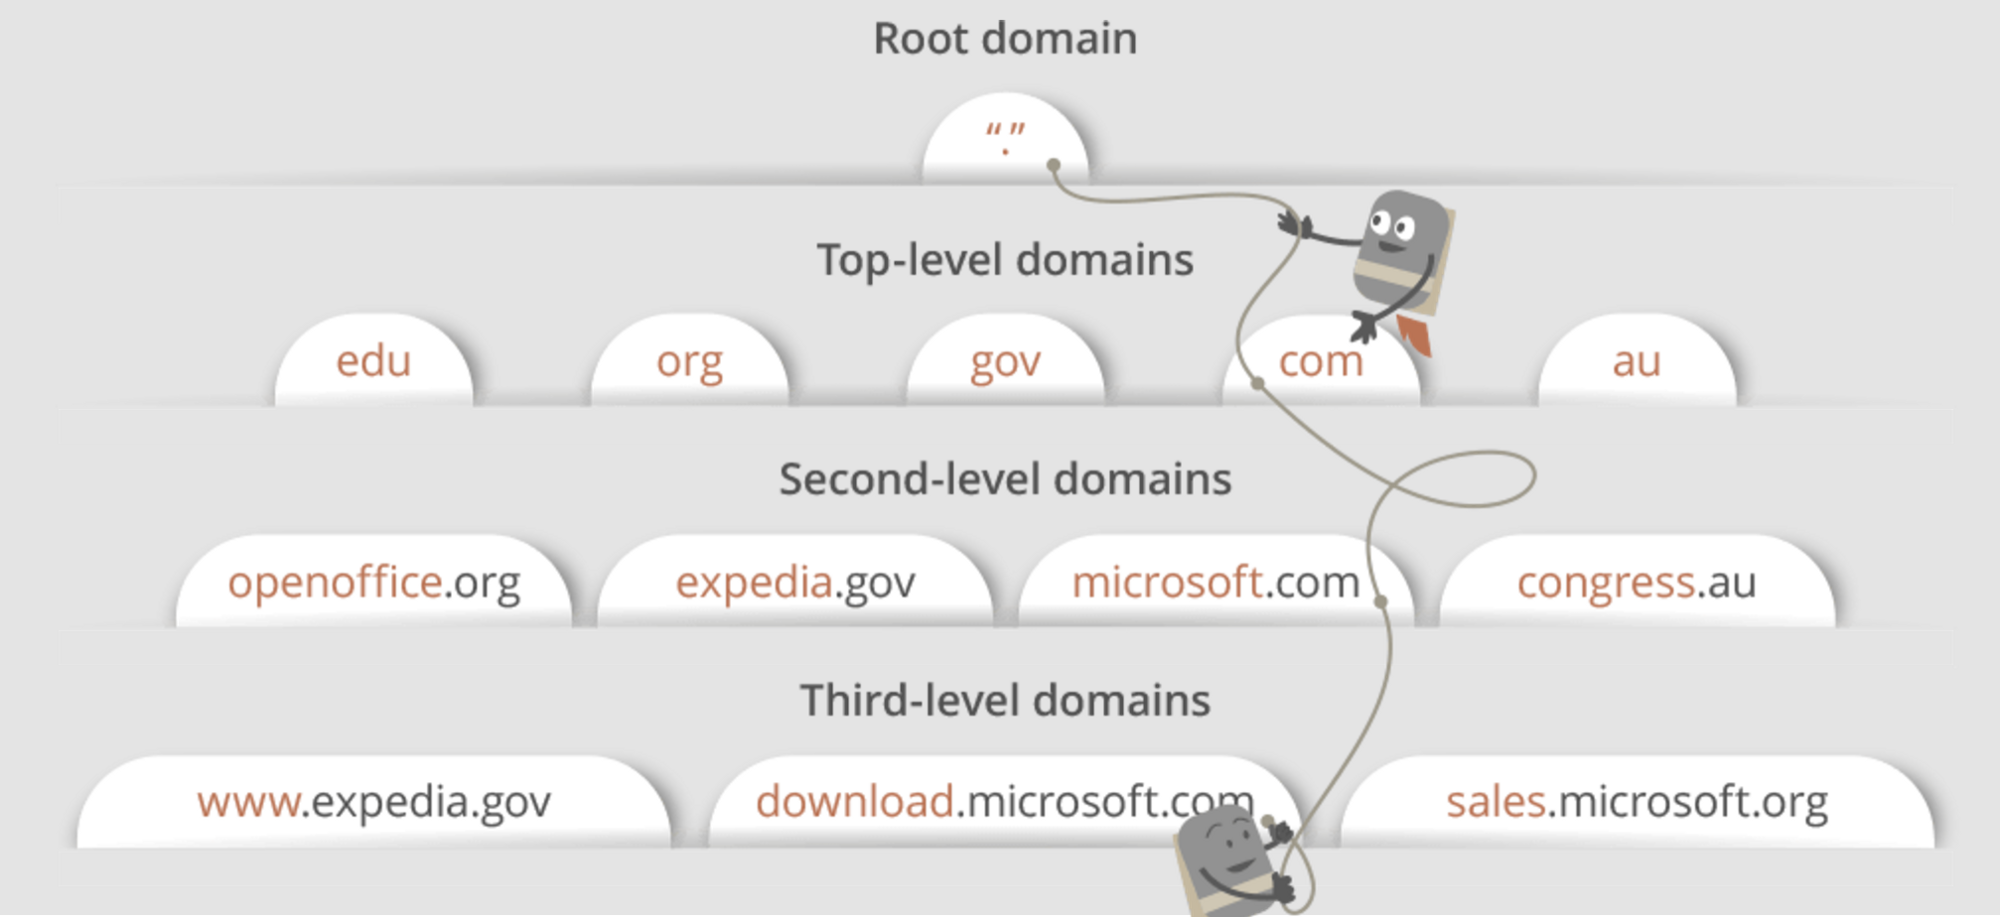
![DNS](images/dns-rev-1.gif)
![DNS Lookup Time](images/Waterfall-Chart-New.png)
- Custom client for address resolution
- **Caching** server
- **Prefetching** client

DNS cache poisoning:
![DNS cache poisoning](images/dns-security-fig3.png)

References:
- [Dnsmasq](http://www.thekelleys.org.uk/dnsmasq/doc.html)

## Multi-Thread
![Multi-Thread](images/Picture1.png)

### Thread Pool
![thread pool](images/400px-Thread_pool.svg.png)

#### Advantages of a Multithreaded
- Improved performance and concurrency
- Simplified coding of remote procedure calls and conversations
- Simultaneous access to multiple applications
- Reduced number of required servers

#### Disadvantages of a Multithreaded
- Difficulty of writing code
- Difficulty of debugging
- Difficulty of managing concurrency
- Difficulty of testing
- Difficulty of porting existing code

### [Tomorrow](https://github.com/madisonmay/Tomorrow)

In [ ]:
urls = [
    'http://www.163.com/',
    'http://www.qq.com/',
    'http://www.alibaba.com/',
    'https://www.baidu.com/',
    'http://www.sina.com.cn/'
]

In [ ]:
import time
import requests

def download(url):
    return requests.get(url)

if __name__ == "__main__":

    start = time.time()
    responses = [download(url) for url in urls]
    html = [response.text for response in responses]
    end = time.time()
    print "Time: %f seconds" % (end - start)

In [ ]:
import time
import requests

from tomorrow import threads

@threads(5)
def download(url):
    return requests.get(url)

# def download(url):
#     return requests.get(url)
# download = threads(download)

if __name__ == "__main__":
    start = time.time()
    responses = [download(url) for url in urls]
    html = [response.text for response in responses]
    end = time.time()
    print "Time: %f seconds" % (end - start)

Multi-Sockets
![sockets](images/TCP_IP_socket_diagram.png)

About APIs
---
Application Programming Interface(API)

### Long URL

In [ ]:
!curl "http://api.longurl.org/v2/expand?url=http://kck.st/1Q51X6T&title=1&content-type=1&rel-canonical=1&format=json"

In [ ]:
import requests
import json

short_url = "http://kck.st/1Q51X6T"
url_template = "http://api.longurl.org/v2/expand?url=%s&title=1&content-type=1&rel-canonical=1&format=json"
tar_url = url_template % short_url
print tar_url

result = requests.get(tar_url).content
json_result = json.loads(result)
print "short url:%s \n->long url:%s " % (short_url, json_result['long-url'])

### Page Summary

In [ ]:
!curl 'http://clipped.me/algorithm/clippedapi.php?url=http://kck.st/1Q51X6T'

In [ ]:
import requests
import json

url = "http://kck.st/1Q51X6T"
url_template = "http://clipped.me/algorithm/clippedapi.php?url=%s"
tar_url = url_template % url

result = requests.get(tar_url).content
json_result = json.loads(result)
print "for:%s\ntitle:%s\nsummary:" % (url, json_result['title'])
for summary in json_result['summary']:
    print summary
    

### Share Count

In [ ]:
!curl 'http://free.sharedcount.com/?url=https://google.com/&apikey=d730c518430eabcabc46ab79528c744067afa17e'

In [ ]:
import requests
import json

url = "https://google.com"
url_template = "http://free.sharedcount.com/?url=%s&apikey=d730c518430eabcabc46ab79528c744067afa17e"
tar_url = url_template % url

result = requests.get(tar_url).content
json_result = json.loads(result)
print "for %(url)s\nFacebook:%(facebook)s\nTwitter:%(twitter)s" % {
    'url' : url,
    'facebook' : json_result['Facebook']['like_count'],
    'twitter' : json_result['Twitter'],
} 

### About Deduplication

![### About Deduplication](images/image5.png)

Set in Python

In [ ]:
urls = [
    'http://www.google.com',
    'http://www.aol.com',    
    'http://www.google.com',
]
dedup = set()
for url in urls:
    dedup.add(url)
print dedup

In [ ]:
hash('fghgfjjhghj')

Bloom Filter
![Bloom Filter](images/800px-Bloom_filter.svg.png)
![](images/Bloom-Filter-Simple-howto.png)

[pybloom](https://github.com/jaybaird/python-bloomfilter)

In [ ]:
from pybloom import BloomFilter
f = BloomFilter(capacity=1000, error_rate=0.001)
[f.add(x) for x in range(10)]

In [ ]:
all([(x in f) for x in range(10)])

### Message Queue
![Message Queue](images/IC709523.png)
- A sender can post a message to the queue.
- A receiver can retrieve a message from the queue (the message is removed from the queue).
- A receiver can examine (or peek) the next available message in the queue (the message is not removed from the queue).
#### Scenarios for Asynchronous Messaging
- Load balancing
- Decoupling workloads
- Temporal decoupling
- Load leveling
- Cross-platform integration
- Asynchronous workflow
- Deferred processing
- Reliable messaging
- Resilient message handling
- Non-blocking receivers

### Google File System
![GFS Architecture](images/gfs_architecture.png)  
- Client translates file name and byte offset to chunk index.
- Sends request to master.
- Master replies with chunk handle and location of replicas.
- Client caches this info.
- Sends request to a close replica, specifying chunk handle and byte range.
- Requests to master are typically buffered.
#### GFS's winning attributes
- Availability
- Performance
- Management
- Cost   

### About Cookie

Requests —— Persistent Sessions

In [ ]:
import requests

url1 = 'http://elib.cnki.net/grid2008/brief/result.aspx?DbPrefix=hotspotcomp&showTitle=学科学术热点'
url2 = 'http://elib.cnki.net/request/search.aspx?action=&PageName=ASP.brief_result_aspx&DBViewType=FullText&DbCatalog=中国学术文献网络出版总库&DbPrefix=hotspotcomp&ConfigFile=hotspotcomp.xml&db_value=SUBJECT_BASE_INFO&NaviField=主题学科代码&orderby=(主题热度值,\'integer\')&txt_extension=false&his=1&SourceTypeCode=undefined&pSourceTypeCode='
url3 = 'http://elib.cnki.net/DataCenter/DoGridTable.aspx?action=grid&pagename=ASP.brief_result_aspx&dbPrefix=hotspotcomp&dbCatalog=中国学术文献网络出版总库&ConfigFile=hotspotcomp.xml&sKuakuID=1&loadgroup=1&prio=true&db_value=SUBJECT_BASE_INFO'

s = requests.Session()
page = s.get(url1)
page = s.get(url2)
page = s.get(url3)
print page.content

pyCookieCheat

In [ ]:
import pyCookieCheat
local_cookies = pyCookieCheat.chrome_cookies(profile='Profile 4', domain='baidu.com')
local_cookies

### About Proxy

In [ ]:
page_content = requests.get(url, cookies=cookies).content, proxies={"http": "http://117.177.243.42:85/",}

### Crawler vs. Anti-Crawler

| Crawler  | Anti-Crawler|
|:------------- |:---------------|
| Naive Crawler(No specific header)      | Verify User-Agent/Referer/X-Requested-With/... | 
| Multi-threaded      |  Connections per IP limit |
| Multi-Proxy | Connections per IP limit + Proxy Dection | 
| *Multi-IP | Cookie Limit |
| Cloud(PaaS(Platform-as-a-Service) / SaaS(Software-as-a-Service)) | OAuth/Cookie limit |
| CrowdSourcing | Credit / Noise / HoneyPot / Pattern Recognition  |

In [ ]:
sc.sc()

- 核心问题 —— 真人/非人 判断
- Multi-IP是业界主流做法——调动大量IP资源进行访问
- 大量帐号的获取——自动/众包
- 封堵 = 极限通告
- 利用漏洞非长久之计
- 最简单的HoneyPot——不可见但能解析/推断的链接

- 数据无价，挖掘有价
- 收藏无价，阅读有价

### A Real Story......

> Please stop automated bots against our platform and stealing data. This is not a good way for a smart guy to spend his time and energy. If you'd like to engage, we love to have intelligent guys join, work with us and make things better.

> I'm so sorry to have troubled you. I'm not a data stealer, but a NLP researcher. I really love your service and I've recommended it to all my friends. In the last days, I did some data collection to analysis social relevances of them, sorry for any inconvenience this may have caused, and I'll stop the collection right now. Further more, do you have any plan to provide open(or commerial) API service? I would appreciate it very much.

> We’re working on a set of OAuth2 APIs for trials with enterprise customers and they should be ready by the end of July. When they’re ready we’d be happy to share based on either a commercial agreement (if using for commercial purposes) or non-commercial agreement meant purely for research/education with all citations/references in place.

> We’re happy to support research work that makes things better.

> In the meantime, if you can please outline what exactly are you looking to do and how may we help, we can figure how we may get you the required data.

> Once we understand and come to an agreement, we’ll unblock your primary account.
Also, to reiterate, please refrain from all data collection without our knowledge and consent. You seem like a talented individual so we consider it mutually beneficial to maintain good relations with you.
We appreciate you recommending us to your friends.